## Abstract

Aim of the research is to find the factors that affect a country's GDP per capita. The dataset takes 227 countries into consideration. There are different factors reated as variables which has values affecting the particular area.

Exploratory Data Analysis is the method used in analysing the dataset which often is done using visual methods. The main characterstics of the data is summarised in this kind of analysis.
We have used histplots, subplots, distplots to determine the analysis. To determine if the factor is left or right skewed, we have used boxplot.

There are null or missing values in the data set as well. We have to figure out on what should be done for null values, as we cannot ignore them.
After the analysis of the output of the functions, we can see that Phones (per 1000), Literacy, Service and Birthrate are the variables that affect the GDP.

It is also observed that Birthrate has the most negative correlation with respect to GDP($ per capita).
In the correlation between phones, GDP and Services we can observe that GDP vs Phones has most positive correlation. Thus, its fair enough to conclude that Phones is the factor affecting the GDP($ per capita).

## The Data

GDP ($ per capita) (Target - the dependent variable)

Possible independent variables (predictors)

Country, Region, Population, Area (sq. mi.), Pop. Density (per sq. mi.), Coastline (coast/area ratio), Net migration, Infant mortality (per 1000 births), Literacy, Phones (per 1000), Arable, Crops , Other, Climate, Birthrate, Deathrate, Agriculture, Industry, Service

## Acknowledgements

Source: All these data sets are made up of data from the US government. Data from the World Factbook is public domain. The website says "The World Factbook is in the public domain and may be used freely by anyone at anytime without seeking permission." https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

The libraries are imported in the lines of code given below. These are required to do calculations and analysis of data. 

In [3]:
# importing libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

We need to read the data from CSV file so that we can analyse the data.

In [4]:
# importing the dataset
df=pd.read_csv("countries of the world.csv", decimal = ',')

We need to test if the data is of the right type. Hence head() function is used to view the first 5 set of rows from the data.

In [5]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


We need the statistics of the data that we are working on so that we can see how that data set is shaped. For this purpose we use describe() function.

In [6]:
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


Based on GDP($ per capita), the countries are sorted and displayed. Top 20 Countries with highest GDP are displayed below.

In [7]:
top_gdp_countries = df.sort_values('GDP ($ per capita)',ascending=False)
# Look at top 20
top_gdp_countries[['GDP ($ per capita)','Country']].head(20)

,GDP ($ per capita),Country
121,55100.0,Luxembourg
154,37800.0,Norway
214,37800.0,United States
22,36000.0,Bermuda
38,35000.0,Cayman Islands
177,34600.0,San Marino
196,32700.0,Switzerland
54,31100.0,Denmark
93,30900.0,Iceland
12,30000.0,Austria


matplotlib.pyplot.subplots creates figure and subplots. The below set of code creates a bar graph with countries on x-axis and GDP($ per capita) on y-axis. Graph takes values of top 33 countries with high GDP.

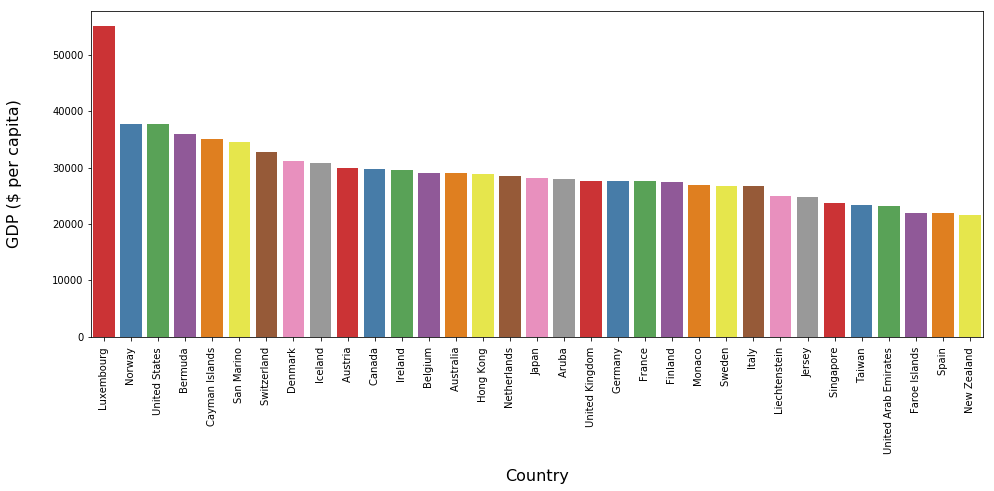

In [8]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='GDP ($ per capita)', data=top_gdp_countries.head(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(),labelpad=15)
ax.set_ylabel(ax.get_ylabel(),labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

matplotlib.pyplot.subplots creates figure and subplots. The below set of code creates a bar graph with countries on x-axis and GDP($ per capita) on y-axis. Graph takes values of the last 33 countries based on GDP.

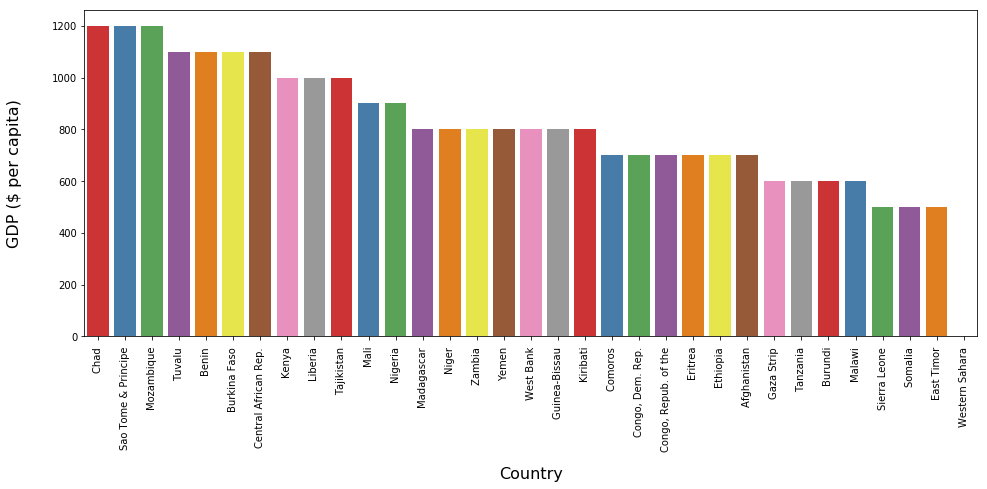

In [9]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='GDP ($ per capita)', data=top_gdp_countries.tail(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

Here, The total count of null values for each factor and the respective percentage of null values is calculated and printed.
For eg. Climate is null for 22 entries in the data and it is 9.69%.

In [10]:
total = df.isnull().sum()[df.isnull().sum() != 0].sort_values(ascending = False)
percent = pd.Series(round(total/len(df)*100,2))
pd.concat([total, percent], axis=1, keys=['total_missing', 'percent'])

,total_missing,percent
Climate,22,9.69
Literacy (%),18,7.93
Industry,16,7.05
Service,15,6.61
Agriculture,15,6.61
Deathrate,4,1.76
Phones (per 1000),4,1.76
Birthrate,3,1.32
Infant mortality (per 1000 births),3,1.32
Net migration,3,1.32


The below code tells if any value is null or missing as we may wish to evaluate them.

In [11]:
df.isnull().values.any()

True

The below code determines how many missing values exists for all columns.

In [12]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

The sum of all missing values is displayed in the code below.

In [13]:
df.isnull().sum().sum()

110

## Region

For each region, the total of GDP($ per capita), literacy percentage and agriculture values are displayed.

In [14]:
df.groupby('Region')[['GDP ($ per capita)', 'Literacy (%)', 'Agriculture']].median()

,GDP ($ per capita),Literacy (%),Agriculture
Region,,,
ASIA (EX. NEAR EAST),3450.0,90.60,0.1610
BALTICS,11400.0,99.80,0.0400
C.W. OF IND. STATES,3450.0,99.05,0.1980
EASTERN EUROPE,9100.0,98.60,0.0815
LATIN AMER. & CARIB,6300.0,94.05,0.0700
NEAR EAST,9250.0,83.00,0.0350
NORTHERN AFRICA,6000.0,70.00,0.1320
NORTHERN AMERICA,29800.0,97.50,0.0100
OCEANIA,5000.0,95.00,0.1505


info() function displays the data type of each of the columns available in the data set file.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null float64
Coastline (coast/area ratio)          227 non-null float64
Net migration                         224 non-null float64
Infant mortality (per 1000 births)    224 non-null float64
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null float64
Phones (per 1000)                     223 non-null float64
Arable (%)                            225 non-null float64
Crops (%)                             225 non-null float64
Other (%)                             225 non-null float64
Climate                               205 non-null float64
Birthrate       

We need to test if the data is of the right type. Hence head() function is used to view the first 5 set of rows from the data.

In [16]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


Boxplots are used to show distribution of data for the variables in consideration. In the below code, "Literacy" is the variable on which boxplot is drawn. Since the median is some where around 95, most of the data lies towards the left of the median and hence is left skewed.

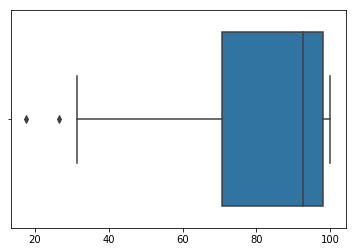

In [18]:
sns.boxplot(np.array(df['Literacy (%)']))

In the below code, "GDP($ per capita)" is the variable on which boxplot is drawn. Since the median is some where around 6000, most of the data lies towards the right of the median and hence is right skewed.

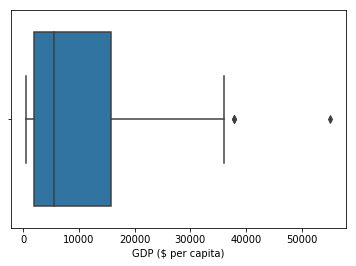

In [19]:
sns.boxplot(df['GDP ($ per capita)'])

To get the correlation between 2 columns, we use dataframe.corr() function. The values ranges from +1 to -1. the negatives indicate negative correlation whereas positive values indicate positive correlation. 

In [20]:
df.corr()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Population,1.000000,0.469985,-0.028190,-0.068199,0.000011,0.023003,-0.039324,-0.043481,-0.030819,0.188251,-0.060757,-0.120606,-0.026546,-0.045090,-0.028367,0.000376,0.099333,-0.080852
Area (sq. mi.),0.469985,1.000000,-0.066917,-0.095627,0.047470,-0.007163,0.072185,0.035994,0.053403,-0.079714,-0.143916,0.138974,-0.117134,-0.066423,0.040079,-0.050640,0.121565,-0.054369
Pop. Density (per sq. mi.),-0.028190,-0.066917,1.000000,0.241690,0.178038,-0.144238,0.195773,0.097230,0.280172,-0.081015,-0.031661,0.081859,0.009064,-0.159192,-0.070045,-0.107142,-0.139803,0.248774
Coastline (coast/area ratio),-0.068199,-0.095627,0.241690,1.000000,-0.134145,-0.136577,0.049118,0.117095,0.152129,-0.120772,0.341820,-0.079494,-0.032579,-0.075765,-0.161866,-0.030250,-0.199995,0.196528
Net migration,0.000011,0.047470,0.178038,-0.134145,1.000000,-0.025015,0.382461,-0.008761,0.239601,-0.058170,-0.347968,0.225299,-0.015170,-0.066537,0.033611,-0.116719,-0.026324,0.127134
Infant mortality (per 1000 births),0.023003,-0.007163,-0.144238,-0.136577,-0.025015,1.000000,-0.600774,-0.765536,-0.672312,-0.113859,-0.062366,0.124100,-0.374406,0.845764,0.656338,0.709475,0.003322,-0.633982
GDP ($ per capita),-0.039324,0.072185,0.195773,0.049118,0.382461,-0.600774,1.000000,0.513144,0.834499,0.019768,-0.219229,0.097828,0.340791,-0.650137,-0.201661,-0.586769,-0.028926,0.550216
Literacy (%),-0.043481,0.035994,0.097230,0.117095,-0.008761,-0.765536,0.513144,1.000000,0.601935,0.105021,0.042825,-0.107563,0.392081,-0.790846,-0.393946,-0.609638,0.064733,0.494607
Phones (per 1000),-0.030819,0.053403,0.280172,0.152129,0.239601,-0.672312,0.834499,0.601935,1.000000,0.061022,-0.152420,0.029900,0.402161,-0.724614,-0.260309,-0.601739,-0.152452,0.683934
Arable (%),0.188251,-0.079714,-0.081015,-0.120772,-0.058170,-0.113859,0.019768,0.105021,0.061022,1.000000,0.094361,-0.856763,0.380031,-0.186823,0.053472,-0.034822,-0.063618,0.091126


The numbers derived from the correlation above is difficult to read. Hence, a heatmap is used so that the correlations are easier to read. The dark red indicates maximum of positive correlation, whereas dark blue indicates maximum of negative correlation.

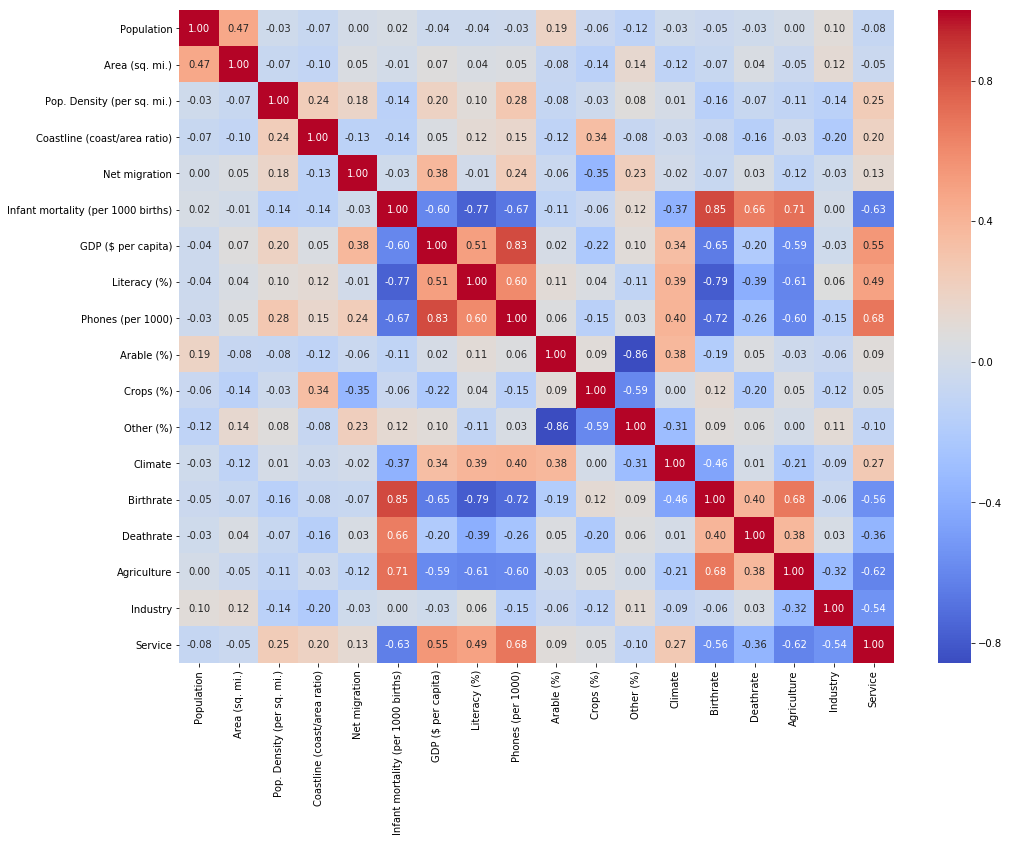

In [21]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

Since darker colors are spread across variables like GDP ($ per capita),Literacy,Phones (per 1000),Service,Infant mortality (per 1000 births),Birthrate,Deathrate. The values as a result of correlation for these variables are stored in index x. Thus eliminating the other factors.

In [22]:
x = df[['GDP ($ per capita)','Literacy (%)','Phones (per 1000)','Service','Infant mortality (per 1000 births)',
        'Birthrate','Deathrate']]

The heatmap() is again used to visualize these values for the selected factors as below.

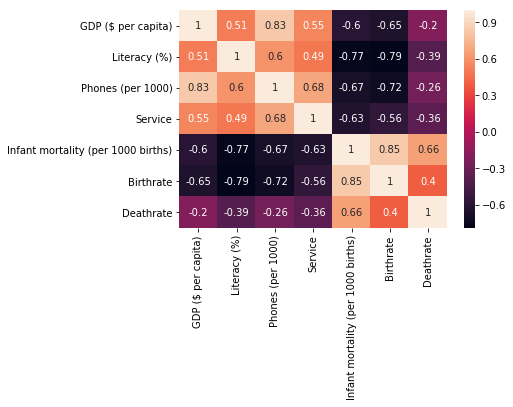

In [23]:
sns.heatmap(x.corr(), annot=True)

Here, linear regression model used to plot the graph. GDP factor is constant in all graphs in y axis. The graph is plotted as GDP vs other variables.

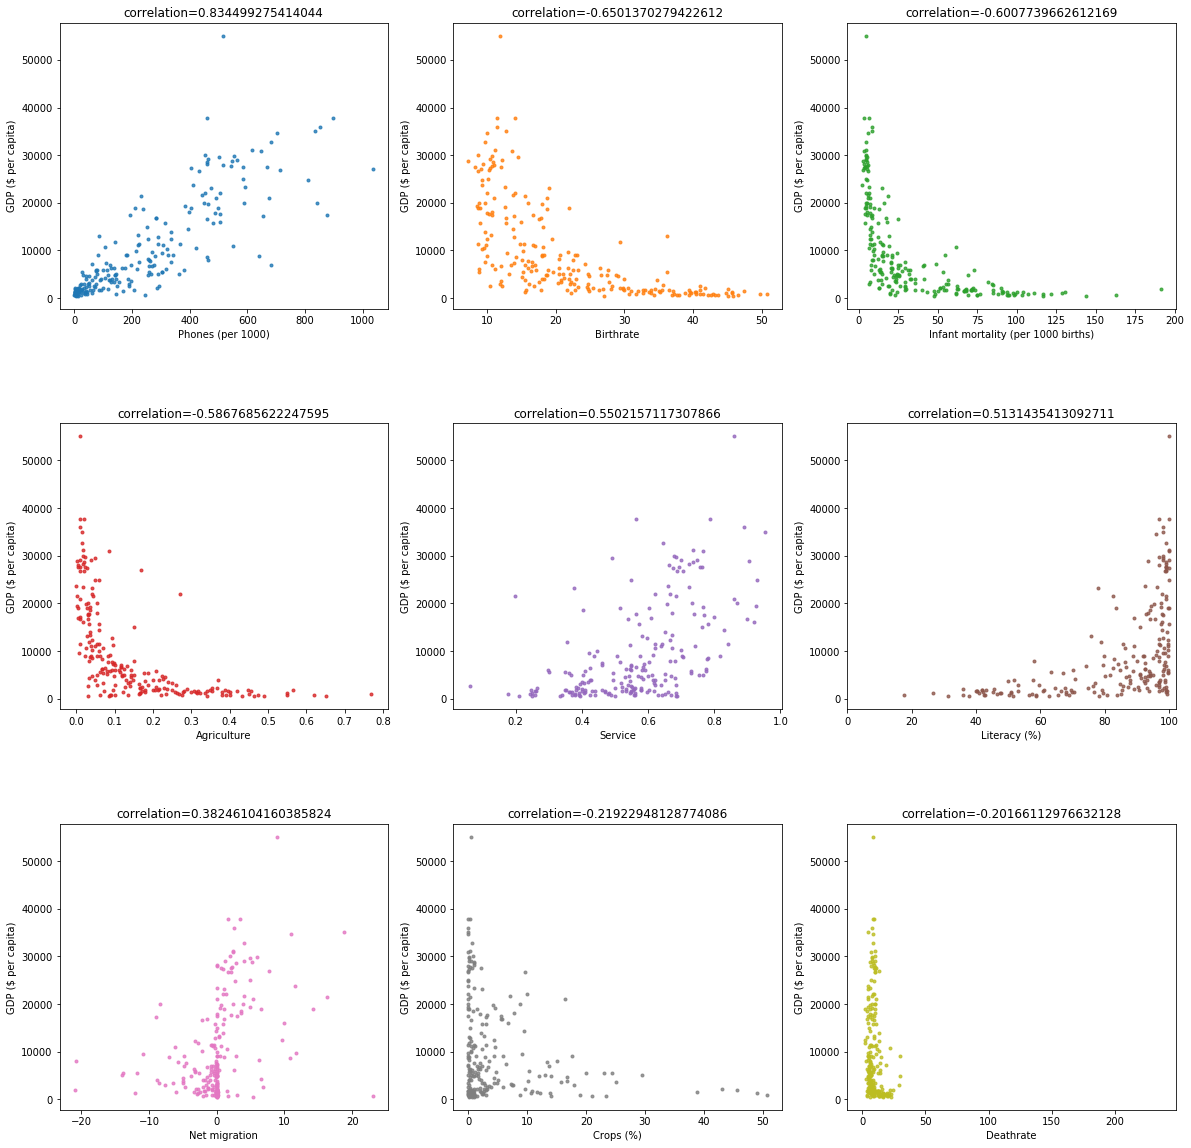

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series()
for col in df.columns.values[2:]:
    if ((col!='GDP ($ per capita)')&(col!='Climate')):
        corr_to_gdp[col] = df['GDP ($ per capita)'].corr(df[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(3):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP ($ per capita)', data=df,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

Based on the above results, we see that Phones and Services fits into the linear regression model for the GDP Factor, whereas others don't. Hence we have aggregated median of GDP, Phones and Services for each Region.  

In [25]:
df.groupby('Region')[['GDP ($ per capita)', 'Phones (per 1000)', 'Service']].median()

,GDP ($ per capita),Phones (per 1000),Service
Region,,,
ASIA (EX. NEAR EAST),3450.0,61.50,0.4950
BALTICS,11400.0,321.40,0.6660
C.W. OF IND. STATES,3450.0,155.35,0.4595
EASTERN EUROPE,9100.0,296.05,0.5910
LATIN AMER. & CARIB,6300.0,222.85,0.6180
NEAR EAST,9250.0,211.00,0.5840
NORTHERN AFRICA,6000.0,123.60,0.4255
NORTHERN AMERICA,29800.0,683.20,0.7870
OCEANIA,5000.0,118.60,0.6440


Since, null values cannot be ignored, we have to deal with it. We can either drop them or fill them with any appropriate statistics or predict the missing values using any algorithm.
We chose to fill the null values with median(appropriate statistics). After filling the null values with median, the same is being stored in "x" and being displayed.

In [26]:
# choose attributes which shows relation
df.fillna(df.median(),inplace=True)
x = df[['GDP ($ per capita)','Phones (per 1000)','Service']]
print(x)

     GDP ($ per capita)  Phones (per 1000)  Service
0                 700.0                3.2    0.380
1                4500.0               71.2    0.579
2                6000.0               78.1    0.298
3                8000.0              259.5    0.571
4               19000.0              497.2    0.571
5                1900.0                7.8    0.246
6                8600.0              460.0    0.780
7               11000.0              549.9    0.743
8               11200.0              220.4    0.547
9                3500.0              195.7    0.418
10              28000.0              516.1    0.663
11              29000.0              565.5    0.700
12              30000.0              452.2    0.678
13               3400.0              137.1    0.402
14              16700.0              460.6    0.900
15              16900.0              281.3    0.608
16               1900.0                7.3    0.603
17              15700.0              481.9    0.780
18          

Since, GDP, Phones and services fits into the model, we would assume that these might be the factors affecting the same. Hence, we use pairplot to see the correlation between these factors in form of visualization.

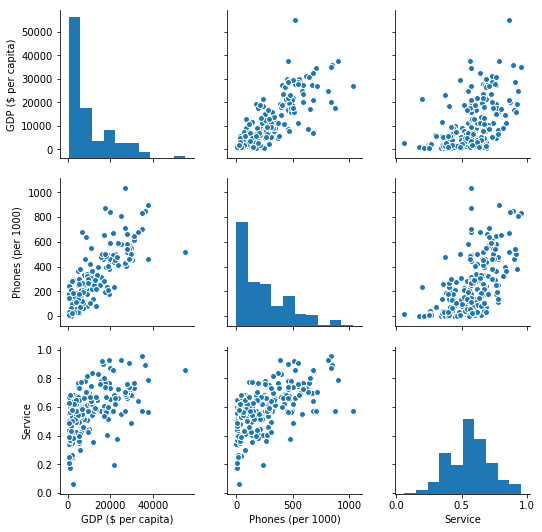

In [27]:
x = df[['GDP ($ per capita)','Phones (per 1000)','Service']]
sns.pairplot(x)

The same correlation visualized above is given in form of table with values below. We can observe that GDP and Phones have the most positive correlation.

In [28]:
x.corr()

,GDP ($ per capita),Phones (per 1000),Service
GDP ($ per capita),1.000000,0.830903,0.532418
Phones (per 1000),0.830903,1.000000,0.626184
Service,0.532418,0.626184,1.000000


Sinced we have handles the missing values, GDP now doesn't have any nullvalues. We have stored the same in gdp_no_nan and displayed it.

In [29]:
gdp_no_nan= df['GDP ($ per capita)']

In [30]:
gdp_no_nan

0        700.0
1       4500.0
2       6000.0
3       8000.0
4      19000.0
5       1900.0
6       8600.0
7      11000.0
8      11200.0
9       3500.0
10     28000.0
11     29000.0
12     30000.0
13      3400.0
14     16700.0
15     16900.0
16      1900.0
17     15700.0
18      6100.0
19     29100.0
20      4900.0
21      1100.0
22     36000.0
23      1300.0
24      2400.0
25      6100.0
26      9000.0
27      7600.0
28     16000.0
29     18600.0
        ...   
197     3300.0
198    23400.0
199     1000.0
200      600.0
201     7400.0
202     1500.0
203     2200.0
204     9500.0
205     6900.0
206     6700.0
207     5800.0
208     9600.0
209     1100.0
210     1400.0
211     5400.0
212    23200.0
213    27700.0
214    37800.0
215    12800.0
216     1700.0
217     2900.0
218     4800.0
219     2500.0
220    17200.0
221     3700.0
222      800.0
223     5550.0
224      800.0
225      800.0
226     1900.0
Name: GDP ($ per capita), Length: 227, dtype: float64

distplot is effective way to look at univariate distribution in seaborn. A histogram and kernel density estimate(KDE) is drawn implicitly by distplot. x-axis always represents the values, in this case being GDP without missing values, and y-axis represents probability density.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


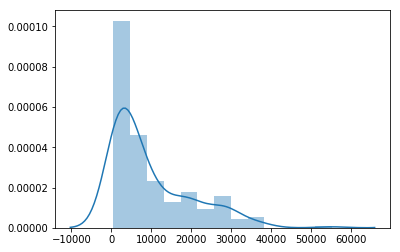

In [31]:
sns.distplot(np.array(gdp_no_nan))

distplot of phones will have values of Phones on x-axis and y-axis consists of the probability density.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


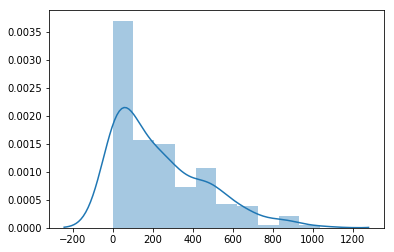

In [33]:
sns.distplot(np.array(df['Phones (per 1000)']))

## Conclusion

Exploratory Data Analysis has been used for data analysis here.
Linear Regression model is used to see the stats. To determine our analysis, we have used regplot, distplot, pairplot, histogram.
Boxplot is used to determine if the feature or factor is left or right skewed.
It is also observed that Birthrate has the most negative correlation with respect to GDP($ per capita).
In the correlation between phones, GDP and Services we can observe that GDP vs Phones has most positive correlation. Thus, its fair enough to conclude that Phones is the factor affecting the GDP($ per capita).

## Contribution

By own:20%

By External Source:80% 

## Citations

https://towardsdatascience.com/the-tale-of-missing-values-in-python-c96beb0e8a9d

https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

https://www.kaggle.com/stieranka/predicting-gdp-world-countries

https://matplotlib.org/

http://www.numpy.org/

https://github.com/nikbearbrown/INFO_6105/blob/master/Assignments/Countries_of_the_World_EDA_Assignment_1.ipynb

## License

Copyright 2019 Sahana Jangali

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.